<a href="https://colab.research.google.com/github/kumarmayank29/Churn-Modelling/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Churn_Modelling**

**This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.**

In [1]:
# import the libraries
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn.csv to Churn.csv


In [4]:
data=pd.read_csv("Churn.csv")

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,225,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,629,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,619,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,43,2,134603.88,1,1,1,71725.73,0


**Unique Values in GeoGraphy and Gender**

In [10]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

**Handle Missing Values**

Repalce with Mean Median or Mode

data['Geography'].fillna(data['Geography'].mode()[0],inplace=True)

data['Age'].fillna(data['Age'].mean(),inplace=True)

**What is Churn Its percentage of Subscriber moving from one survice to another service**

Suppose You are an owner of a Airtel Compnmay then weather a subscriber will take your service or quit is is basically what is called churn
This is data about a bank industry,So in bank industry we are trying to create an algorithm to predict if a person will continue/Quiting the bank

Characteristics of Customer given in form of Columns.The Person with given information may/maynot continue with the bank

Row Number,Surname,CustomerId is not at all responsible in predicting the exite state

5.Records which are really important in predicting Exite are

Credit Score

Gender -Female Housewives not very active in bank deposits.

Geography -How Far Bank is from your place

Age -Offcourse Its Important

Tennure -Yes

Balance

Other are all

Exited is Our Output and Rest will form out input

In [14]:

data['Geography'].fillna(data['Geography'].mode()[0],inplace = True)
data['Age'].fillna(data['Age'].mean(),inplace = True)
data['Balance'].fillna(data['Balance'].median(),inplace = True)

In [16]:

data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

**Convert ("Categorical Data") Text Data To Numerical Data**

**For this we use LabelEncoder class**

In Label Encoding the numerical values are associated wrt alphabets in an order in which alphabets occur

For Example France (F) comes prior to Germany (G) hence france is given value of 0 Germany 1

Consider we have values like France,Germany,Spain,USA,NewYork and India Then Labels will be

1. France-0
2. Germany-1
3. India-2
4. NewYork-3
5. Spain-4
6. USA-5

In [17]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,225,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,629,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Geography']=le.fit_transform(data['Gender'])

In [19]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,225,0,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,629,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0


In [20]:
data['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [21]:
data['Geography'].value_counts()

1    5457
0    4543
Name: Geography, dtype: int64

**Disadvantage of Label Encoding**

1. Even though these have been converted to numerical format machine is still going to consider it as numbers and not category and based on those numbers model will start giving them priorities based on its numerical value which we dont want

2. So here comes another step to convert numerically converted data to binary format so no priorities are set based on numerical values category .These numericals values are categopry are just representation it has nothing to do with its own significant value France and germany cannot be compared one cannot say France>Germany

3. Hence we need to convert Numerically Converted data to binary format---This Step is called ONE HOT ENCODING

ONE HOT ENCODING

Before One Hot Encoding Divide data in inputs and outputs

One Hot Encoding is applied only to arrays but here in out case we have dataframe so to convert dataframe to arrays we need to use .values

Applying one hot encoding to any categorical columns will create that many rows suppose we have

Germany France Spain

0 1 0 When France occur

1 0 0 When germany occur

0 0 1 When Spain occurs

In [23]:
x = data.iloc[:,3:13].values

In [25]:

y = data.iloc[:,13].values

In [26]:
x

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [2.2500000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [6.2900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [27]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [28]:
x.shape

(10000, 10)

In [29]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(x[:,1:2]).toarray()

In [31]:
x = np.delete(x,1,axis = 1)
x

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [2.2500000e+02, 0.0000000e+00, 4.1000000e+01, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [6.2900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [32]:
x = np.concatenate((z,x),axis = 1)

In [33]:
z

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])


**Split the data in to train and test**


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [35]:
x_test.shape,"  ",y_test.shape,"  ",x_train.shape,"  ",y_train.shape

((2000, 11), '  ', (2000,), '  ', (8000, 11), '  ', (8000,))

In [36]:
#Taking on necessary features
x_train[:,5:10]

array([[5.0000000e+00, 0.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 7.5681520e+04, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00],
       [2.0000000e+00, 1.1236734e+05, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       ...,
       [5.0000000e+00, 1.6127405e+05, 2.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [9.0000000e+00, 0.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        1.0000000e+00],
       [1.0000000e+00, 1.0807633e+05, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00]])

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [39]:

x_train.shape

(8000, 11)

**Theory Explanation For below Code**

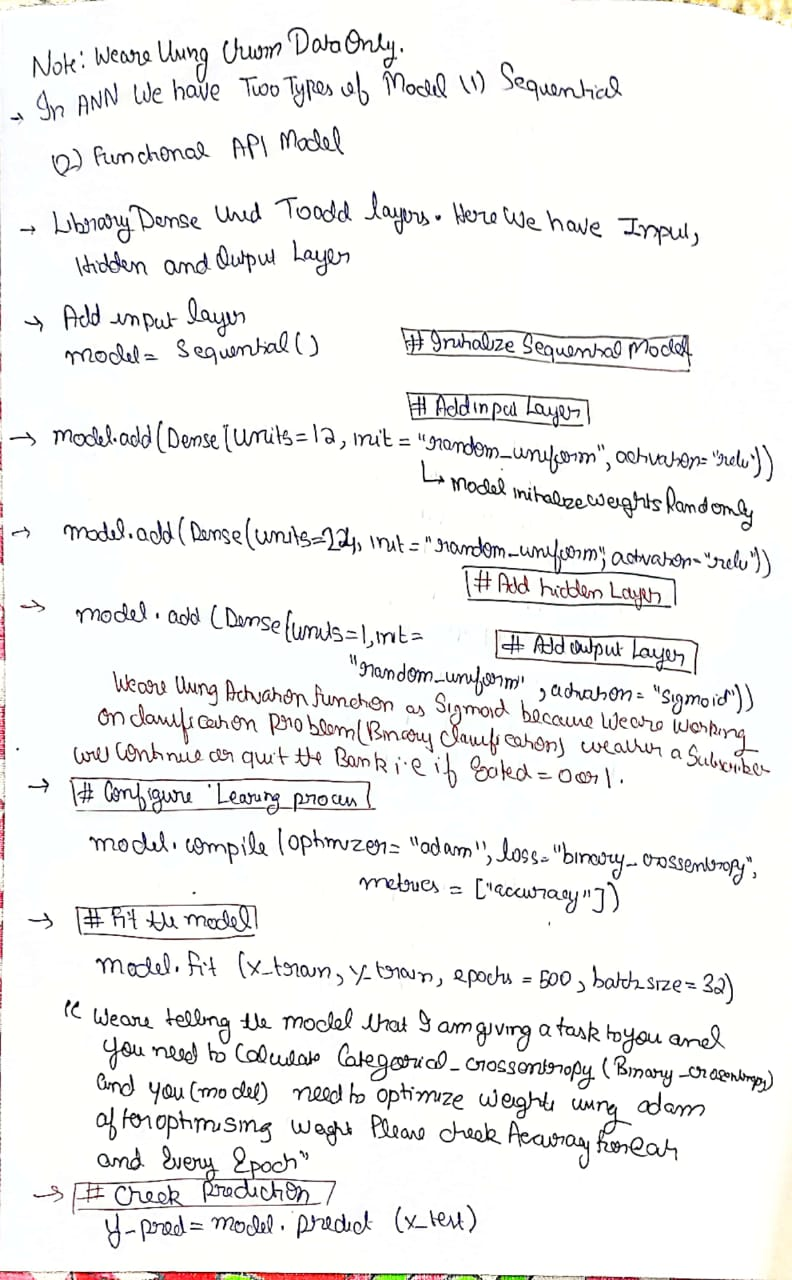

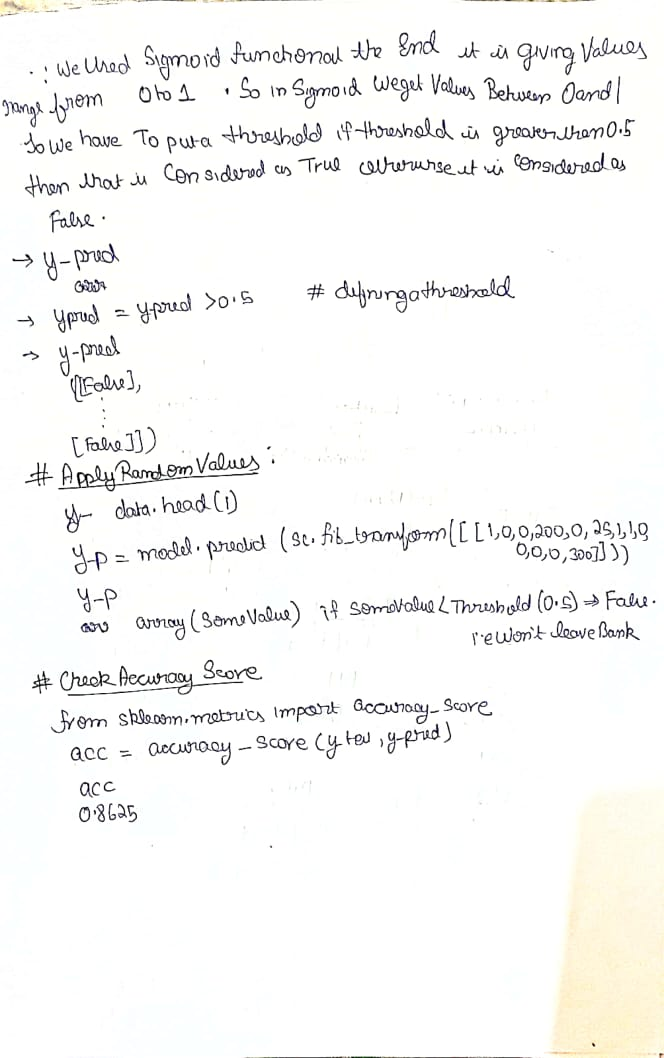

**Import Libraries**

In [40]:
import keras
from keras.layers import Dense
from keras.models import Sequential

**Initialize the model**

In [41]:
model = Sequential()   

**Add the Input Layer**

In [43]:
model.add(Dense(units = 12,activation = "relu"))

**Add Hidden Layer**

In [45]:
model.add(Dense(units = 24,activation = "relu"))

**Add Output Layer**

In [46]:
model.add(Dense(units = 1,activation = "sigmoid"))

**Compile the Model OR Configure Learning Process**

In [47]:
model.compile(optimizer = "adam",loss = "binary_crossentropy", metrics = ["accuracy"])

**Fit the model**

In [48]:
model.fit(x_train,y_train,batch_size = 32 , epochs = 500 )

Epoch 1/500
250/250 [==============================] - 1s 1ms/step - loss: 0.6522 - accuracy: 0.5815
Epoch 2/500
250/250 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7919
Epoch 3/500
250/250 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8030
Epoch 4/500
250/250 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8093
Epoch 5/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8372
Epoch 6/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8410
Epoch 7/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8478
Epoch 8/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8498
Epoch 9/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8571
Epoch 10/500
250/250 [==============================] - 0s 1ms/step - loss: 0.3441 - accura

In [49]:
y_pred  = model.predict(x_test)

In [50]:
y_pred

array([[0.22539681],
       [0.27417284],
       [0.45618963],
       ...,
       [0.07323271],
       [0.12001923],
       [0.09521106]], dtype=float32)

In [51]:
y_pred = (y_pred > 0.5) #Since we have used Sigmoid so its necessary to decide a threshold above it values is True below it values will be false

In [52]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

**Test on a Random Sample**

In [ ]:
#y_p = model.predict(sc.fit_transform(([[1,0,0,200,0,25,1,1,0,0,0,0,30000]])))

**Check For the Accuracy**

In [57]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)

In [59]:
print("The Accuracy of Model is ",acc*100,"%")

The Accuracy of Model is  85.0 %
